In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score , recall_score

Loading and Inspecting the data


In [19]:

data = pd.read_csv('insurance_risk_data.csv')
data.head()

,ID,Age,Annual_Income,Number_of_Dependents,High_Risk
0,e5af5c97-7714-4857-88a8-5fcfbb7d3e10,53,97535,3,0
1,92a4ee1a-fcad-4399-a680-55a60499d57b,29,104690,2,0
2,af1437c5-36bf-49c6-b480-0b7e905f6901,42,30373,5,1
3,d761a02d-1cda-4ca3-86ba-a6cbe2436599,49,64438,2,0
4,dc141cdb-444c-47d2-8e95-272e03d1d040,29,69251,5,0


In [20]:
print(data.describe())

             Age  Annual_Income  Number_of_Dependents  High_Risk
count  20.000000      20.000000             20.000000  20.000000
mean   45.300000   71609.750000              2.650000   0.250000
std    15.131355   22988.617776              1.598519   0.444262
min    21.000000   30373.000000              0.000000   0.000000
25%    29.000000   62080.500000              2.000000   0.000000
50%    51.000000   73181.000000              2.000000   0.000000
75%    56.500000   83349.000000              4.000000   0.250000
max    64.000000  115684.000000              5.000000   1.000000


In [21]:
print(data.isnull().sum())

ID                      0
Age                     0
Annual_Income           0
Number_of_Dependents    0
High_Risk               0
dtype: int64


EDA( Exploratory Data Analysis )


`sns.pairplot()` : Creates pairwise plots to visualize the relationship between variables

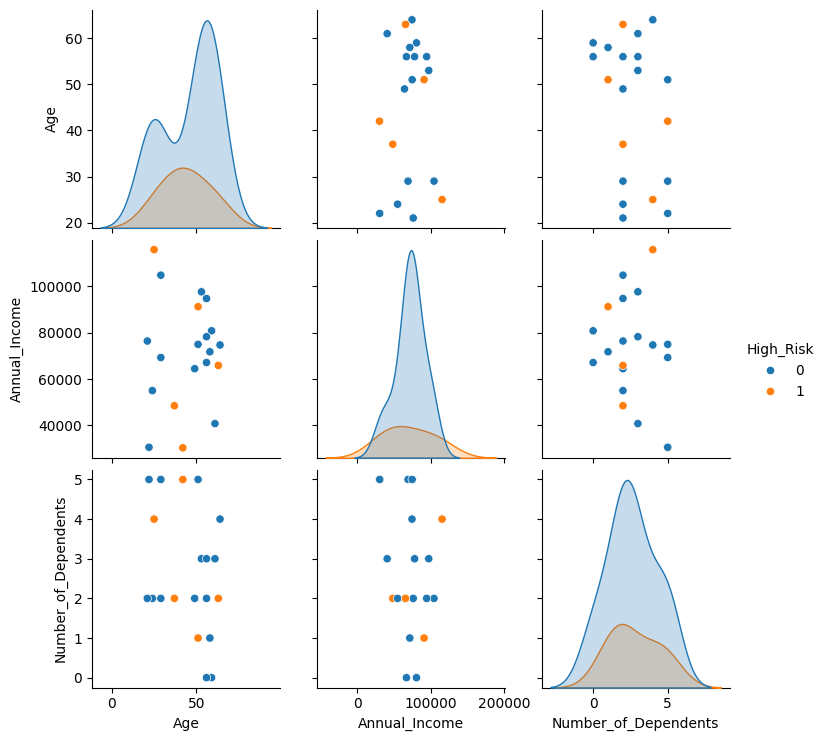

In [22]:

sns.pairplot(data , hue='High_Risk')

Data Preprocessing


Handle Missing Values and Scaling Features

In [23]:


scaler = StandardScaler()
data[['Age', 'Annual_Income', 'Number_of_Dependents']] = scaler.fit_transform(data[['Age', 'Annual_Income', 'Number_of_Dependents']])

X = data.drop(columns=['High_Risk','ID'])
y = data['High_Risk']

print(X.head())
print(y.head())

        Age  Annual_Income  Number_of_Dependents
0  0.522097       1.157040              0.224641
1 -1.105218       1.476366             -0.417190
2 -0.223756      -1.840390              1.508302
3  0.250878      -0.320074             -0.417190
4 -1.105218      -0.105271              1.508302
0    0
1    0
2    1
3    0
4    0
Name: High_Risk, dtype: int64


Model Development


Splitting Data into Training and Testign Sets


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Implement 1-NearestNeighbour Classifier

In [25]:
model_1nn = KNeighborsClassifier(n_neighbors=1)
model_1nn.fit(X_train, y_train)

y_pred_1nn = model_1nn.predict(X_test)
accuracy_1nn = accuracy_score(y_test, y_pred_1nn)
precision_1nn = precision_score(y_test, y_pred_1nn)
recall_1nn = recall_score(y_test, y_pred_1nn)

print("Accuracy:", accuracy_1nn)
print("Precision:", precision_1nn)
print("Recall:", recall_1nn)

Accuracy: 0.75
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

y_pred_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)

Accuracy: 1.0
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


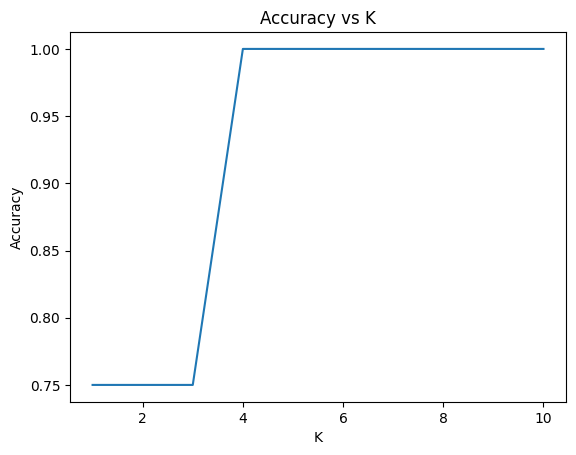

In [29]:
k_values = range(1,11)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(k_values,accuracies)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

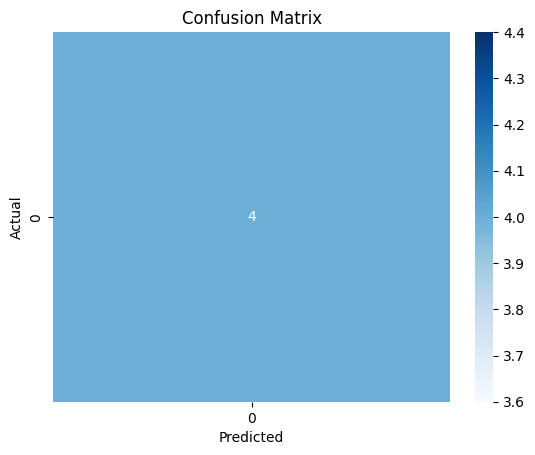

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1,10)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 2}
0.6833333333333332


In [33]:
best_k = grid.best_params_['n_neighbors']
best_model = KNeighborsClassifier(n_neighbors=best_k)
best_model.fit(X_train, y_train)


y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
precesion_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
print("Accuracy:", accuracy_best)
print("Precision:", precesion_best)
print("Recall:", recall_best)

Accuracy: 0.75
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
